$\newcommand{\ax}{\mathbf{a}_x}$
$\newcommand{\ay}{\mathbf{a}_y}$
$\newcommand{\az}{\mathbf{a}_z}$
$\newcommand{\arho}{\mathbf{a}_\rho}$
$\newcommand{\ap}{\mathbf{a}_\phi}$
$\newcommand{\ar}{\mathbf{a}_r}$
$\newcommand{\at}{\mathbf{a}_\theta}$
$\newcommand{\grad}[1]{\nabla #1}$
$\renewcommand{\div}[1]{\mathbf{\nabla} \cdot \mathbf{#1}}$
$\newcommand{\rot}[1]{\mathbf{\nabla} \times \mathbf{#1}}$
$\newcommand{\parcial}[2]{\displaystyle\frac{\partial #1}{\partial #2}}$
$\newcommand{\pard}[2]{\displaystyle\frac{\partial^2 {#1}}{\partial {#2}^2}}$
$\newcommand{\lapcart}[1]{\pard{#1}{x}+\pard{#1}{y}+\pard{#1}{z}}$
$\newcommand{\lapcili}[1]{\frac{1}{\rho}\parcial{}{\rho}\left(\rho \parcial{#1}{\rho}\right)+\frac{1}{\rho^2}\pard{#1}{\phi}+\pard{#1}{z}}$
$\newcommand{\lapesf}[1]{\frac{1}{r^2}\parcial{}{r}\left(r^2 \parcial{#1}{r}\right)+\frac{1}{r^2\sin \theta }\left(\sin \theta \, \parcial{#1}{\theta}\right)+\frac{1}{r^2\sin \theta}\pard{V}{\phi}}$



# Campos gerados por distribuições de carga

## Distribuições contínuas de carga

<center> <img src='./Figs/Fig4.5.svg'> </center>

Linear. Densidade $\rho_L$, carga/comprimento.

Superficial. Densidade $\rho_S$, carga/área.

Volumétrica. Densidade $\rho_V$, carga/volume.

## Elemento de carga

Trabalha como se fosse uma carga pontual. A carga do elemento é igual à densidade $\times$ dimensão, onde ambas as grandezas dependem do tipo de distribuição. Por exemplo, se a distribuição é de área, então usamos a densidade de área e dimensão = elemento de área. 

Se somarmos todos os elementos ao longo da geometria (linha, área ou volume), o resultado é a carga total dela. Por exemplo, para uma distribuição linear:
$$
\begin{align}
    dQ = \rho_L \, dl \Rightarrow Q = \int_L \rho_L dl
\end{align}
$$

Se somarmos todas as contribuições dos elementos ao longo da mesma geometria, temos o campo total. 
$$
\begin{align}
    \mathbf{E} &= \int_{L} \frac{dQ}{4\pi \epsilon_0 R^2}\mathbf{a}_R
\end{align}
$$

Assim, se o problema é de distribuição linear ou superficial, use o $dQ$ correspondente. A parte complicada é descrever como o vetor $\mathbf{R}$ de um ponto arbitrário do espaço varia em relação aos elementos de carga $dQ$. 

## Solução geral

1. Localize um elemento de carga
2. Escreva a carga do elemento como se fosse um ponto
3. Escreva o vetor posição do elemento
4. Localize um ponto genérico no espaço
5. Escreva o vetor posição do ponto
6. Calcule o vetor deslocamento entre o ponto e o elemento 
7. Escreva a contribuição do elemento em função da carga e do vetor deslocamento
8. Descreva a geometria da distribuição
9. Analise se o problema possui simetria e simplifique quando ela permitir.
10. Integre a contribuição do elemento ao longo da geometria da distribuição para determinar o campo total. 

## Linha de carga

<center> <img src='Fig4.6.svg'> </center>

In [51]:
# Imports
import sympy as sp
from IPython.display import display, Math

- Distribuição unidimensional
- Densidade linear $\rho_L$. 
- O condutor está posicionado ao longo do eixo $z$. 
- Extremidade inferior em $z=A$
- Extremidade superior em $z=B$. 

In [74]:
# Símbolos
x,y,z,z0,dz0 = sp.symbols(['x','y','z','z_0','dz0'], nonzero=True)
# Constantes do problema
rL, eps0 = sp.symbols(['\\rho_L','\\epsilon_0'])
# Extremidades da liha
A,B = sp.symbols(['A', 'B'])

In [75]:
# Ponto arbitrário no espaço
P = sp.ImmutableDenseMatrix([x,y,z])
P


Matrix([
[x],
[y],
[z]])

In [76]:
# Posição do elemento de carga
X = sp.ImmutableDenseMatrix([0,0,z0])
X

Matrix([
[  0],
[  0],
[z_0]])

In [77]:
# Vetor deslocamento
R = P-X
R

Matrix([
[      x],
[      y],
[z - z_0]])

In [78]:
# Campo devido ao elemento de carga
dE = rL*R/(4*sp.pi*eps0*R.norm()**3)
display(Math(r'd\mathbf{E} = ' + sp.latex(dE*dz0)))

<IPython.core.display.Math object>

In [57]:
# Constrói a integral (sem resolver)
E = sp.Integral(dE,(z0,A,B))
display(Math('\mathbf{E} = '+ sp.latex(E)))

<IPython.core.display.Math object>

In [58]:
# Agora resolve
display(Math('\mathbf{E} = ' +  sp.latex(E.doit().simplify())))

<IPython.core.display.Math object>

O resultado é bem complicado de escrever. Vamos ver se em coordenadas cilíndricas fica mais apresentável. 

In [59]:
# Coordenadas cilíndricas
rho = sp.symbols('\\rho', positive=True)
phi = sp.symbols('\\phi', real=True)

In [60]:
# Substituições para coordenadas cilíndricas
coord_cili = [(x,rho*sp.cos(phi)),
              (y,rho*sp.sin(phi))]
display(Math(sp.latex(coord_cili)))

<IPython.core.display.Math object>

In [61]:
# Matriz de transformação
ret2cil = sp.ImmutableDenseMatrix([[sp.cos(phi), sp.sin(phi),0],
                                   [-sp.sin(phi), sp.cos(phi),0],
                                   [0,0,1]])
ret2cil

Matrix([
[ cos(\phi), sin(\phi), 0],
[-sin(\phi), cos(\phi), 0],
[         0,         0, 1]])

In [62]:
# Converte
Ecil = ret2cil@E.doit().subs(coord_cili)
Ecil = Ecil.simplify()
display(Math(r'\mathbf{E} = ' + sp.latex(Ecil)))

<IPython.core.display.Math object>

## Linha infinita

Este é um caso especial do anterior, onde o resultado fica bem simplificado. 

Ele se aplica quando a linha é muito extensa em relação à distância até o ponto. Isso ocorre quando o comprimento da linha é realmente muito grande ou quando estudamos o campo bem próximo da linha.

Em termos matemáticos é como se a linha fosse "infinita". Neste caso, podemos tentar simplificar as expressões fazendo $A\rightarrow -\infty$ e $B\rightarrow \infty$.

In [63]:
# Resolvendo novamente, mas agora com limites infinitos
A = -sp.oo
B = sp.oo
Einf = sp.Integral(rL*R/(4*sp.pi*eps0*R.norm()**3),(z0,A,B))
display(Math(r'\mathbf{E} = ' + 
             sp.latex(Einf) + ' = ' 
             + sp.latex(Einf.doit())))

<IPython.core.display.Math object>

In [64]:
# Convertendo agora para coordenadas cilíndricas
E_inf_cil = ret2cil@Einf.doit().subs(coord_cili)
display(Math(r'\mathbf{E} = ' + 
             sp.latex(E_inf_cil) + 
             ' = ' + sp.latex(E_inf_cil.simplify())))

<IPython.core.display.Math object>

Vamos desenhar o campo agora, para ter uma ideia mais visual. O desenho é feito no plano; tente imaginar como se a linha de carga estivesse saindo ou entrando na tela. 

In [65]:
# Plotagem
import numpy as np
from matplotlib import pyplot as plt

a = np.arange(-2,2,.21)
a = a[a!=0]
X, Y = np.meshgrid(a,a)

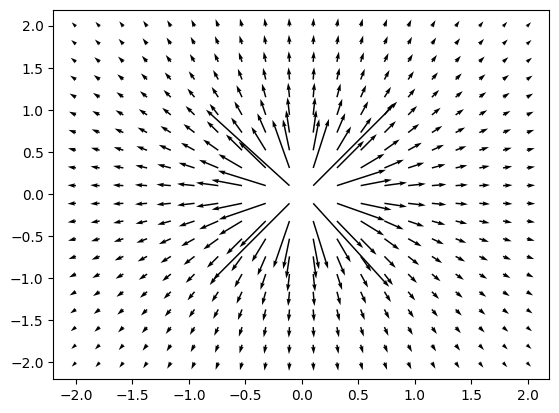

In [66]:
Efun = Einf.doit()
Efun = Efun.subs([(eps0,1e-9/(36.*np.pi)),(rL,1.e-10)]).evalf()
Ex = sp.lambdify([x,y], Efun[0])
Ey = sp.lambdify([x,y], Efun[1])
Ez = sp.lambdify([x,y], Efun[2])
plt.quiver(X,Y,Ex(X,Y),Ey(X,Y));

## Placa circular

Nesse problema queremos o fluxo/campo produzido por uma placa circular de determinado raio $r$, carregada com uma densidade $q_s$. O campo deve ser calculado apenas em um ponto a uma distância $h$ da placa, ao longo de uma linha perpendicular e passando pelo centro da placa. 

<center> <img src='placa-circular.svg'> </center>

In [82]:
# Símbolos
h = sp.symbols('h', positive=True)
qs = sp.symbols('q_s')
dx,dy = sp.symbols(['dx', 'dy'])

In [79]:
# Ponto acima da placa
P = sp.ImmutableDenseMatrix([0,0,h])
P

Matrix([
[0],
[0],
[h]])

In [80]:
# Posição do elemento
Q = sp.ImmutableDenseMatrix([x,y,0])
Q

Matrix([
[x],
[y],
[0]])

In [93]:
# Vetor deslocamento
R = P-Q
display(Math(r'\mathbf{R} = ' + sp.latex(P) + '-' + sp.latex(Q) + '=' + sp.latex(R)))

<IPython.core.display.Math object>

Uma observação importante. O vetor posição possui uma simetria de quadrante. Para ver isso, pegue dois pontos diametralmente opostos no disco, isto é, com coordenadas $x$ e $y$ de sinais opostos. 
$$ \begin{align}
\mathbf{R}_1 &= \left[-x,\, -y,\, h\right]^T\\
\mathbf{R}_2 &= \left[-(-x),\, -(-y),\, h\right]^T
\end{align}
$$

Observe que as duas primeiras componentes desses vetores são opostas, de modo que se somarmos quaisquer dois vetores simétricos, as duas primeiras componentes sempre se anularão. Isso vale para qualquer quadrante do disco.

<center> <img src='simetria-disco.svg'> </center>


Lembre que integrar os elementos é basicamente somar todos os elementos possíveis.

As componentes do vetor de campo são a soma das componentes do vetor deslocamento. Assim, podemos concluir que o campo terá apenas a componente na direção $z$. 

Em se tratando de área (disco), nosso elemento de carga seria, em coordenadas cartesianas:
$$
dQ = q_s\, dx\,dy

In [88]:
# Assim, teríamos o elemento de campo
dE = qs*dx*dy*R/(4*sp.pi*eps0*R.norm()**3)
dE

Matrix([
[-dx*dy*q_s*x/(4*pi*\epsilon_0*(h**2 + x**2 + y**2)**(3/2))],
[-dx*dy*q_s*y/(4*pi*\epsilon_0*(h**2 + x**2 + y**2)**(3/2))],
[ dx*dy*h*q_s/(4*pi*\epsilon_0*(h**2 + x**2 + y**2)**(3/2))]])

Agora, o problema aqui é escrever a geometria do disco em coordenadas retangulares. O que se faz normalmente é escrever os limites da integral conforme a equação do círculo, por exemplo:

Quando $-r\leq x \leq r$, temos: $-\sqrt{r^2-x^2}\leq y \leq \sqrt{r^2-x^2}$. Mas ainda assim temos que dividir a integral em duas parcelas, a metade de cima e a metade de baixo do círculo!

Felizmente, descrever um círculo em torno do eixo $z$ em coordenadas cilíndricas é muito mais simples que isso. 

Basta fazer: $0\leq \rho \leq r$ e $0\leq \phi \leq 2\pi$.

Sendo assim, vamos converter tudo que foi feito até aqui para coordenadas cilíndricas:

In [97]:
# Transforma o vetor deslocamento para componentes cilíndricas
Rc = (ret2cil@R).simplify()
display(Math(r'\mathbf{R} = ' + sp.latex(ret2cil) + sp.latex(R) + 
             '=' + sp.latex(Rc)))

<IPython.core.display.Math object>

In [101]:
# Converte as coordenadas das componentes para sistema cilíndrico
display(Math(r'\mathbf{R} = ' + sp.latex(Rc.subs(coord_cili))))
Rc = Rc.subs(coord_cili)

<IPython.core.display.Math object>

In [102]:
# Simplifica
display(Math(r'\mathbf{R} = ' + sp.latex(Rc.simplify())))
Rc = Rc.simplify()

<IPython.core.display.Math object>

Elemento de área cilíndrico:
$$
dS = \rho\,d\rho\, d\phi
$$

Elemento de carga:
$$
dQ = q_s dS = \rho\,d\rho\, d\phi
$$


O elemento de campo vai ser: 
$$d\mathbf{E} = \frac{dQ\,\mathbf{R}}{4\pi \epsilon_0|\mathbf{R}|^3}$$

In [112]:
# Equacionando
dE = (1/(4*sp.pi*eps0))*Rc/Rc.norm()**3
display(Math(r'd\mathbf{E} = dQ\,' + sp.latex(dE)  ))

<IPython.core.display.Math object>

In [114]:
# Integral do campo
r = sp.symbols('r',positive=True)
E = sp.Integral(sp.Integral(qs*rho*dE,
                            (rho,0,r)),(phi,0,2*sp.pi))
display(Math(r'\mathbf{E} = '+ sp.latex(E)))

<IPython.core.display.Math object>

Agora... a primeira componente é realmente difícil de resolver. Você pode tentar, mas o sympy vai demorar muito tempo e não vai devolver uma resposta. 

Dessa forma, vamos nos preocupar apenas com a componente $z$. 

In [115]:
# Extrai apenas a componente z
Ez = sp.Integral(sp.Integral(qs*dE[2]*rho ,
                             (rho,0,r)),(phi,0,2*sp.pi))
display(Math('E_z = ' + sp.latex(Ez)))

<IPython.core.display.Math object>

In [116]:
# Resolve a integral
display(Math('E_z = ' + sp.latex(Ez.doit())))
display(Math('E_z = ' + sp.latex(Ez.doit().simplify())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Suponha que $q_s = 2\epsilon_0$ e $r = 1$. Vamos plotar essa função e estudar seu comportamento. 

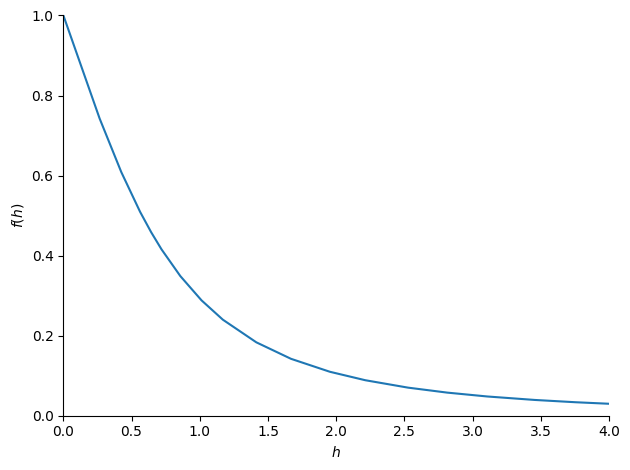

In [22]:
# Plotagem da componente z do campo
from sympy.plotting import plot
campo = Ez.doit().simplify().subs({qs: 2*eps0, r:1})
plot(campo, xlim=[0,4],ylim=[0,1]);


Outro resultado interessante é se fizermos $r\rightarrow \infty$. Isso equivale a um disco infinito, ou, se o plano inteiro estivesse carregado. 

Na prática queremos dizer que a distância $h$ é pequena em relação ao raio da placa. Se tirarmos o limite de $E_z$ temos um resultado bem compacto.

In [117]:
# Campo produzido por placa infinita:
Ez_inf = sp.limit(Ez.doit().simplify(), r,sp.oo)
display(Math('E_z = ' + sp.latex(Ez_inf)))

<IPython.core.display.Math object>

Perceba que o campo é uniforme. 

## Outros exemplos:

<center> <img src='./Figs/Ex4.4.svg'> </center>

<center> <img src='./Figs/Ex4.5.svg'> </center>

<center> <img src='./Figs/Ex4.6.svg'> </center>